# <span style="color:blue;">**Project Overview: Topic Modeling for Research Articles**</span>

## <span style="color:darkblue;">**Objective**</span>
Discover the abstract topics that occur in a collection of research articles using Latent Dirichlet Allocation (LDA).

## <span style="color:darkblue;">**Key Libraries Used**</span>
- **Pandas**: For data manipulation.
- **NumPy**: For numerical operations.
- **NLTK**: For natural language processing tasks.
- **Gensim**: For implementing LDA modeling.
- **pyLDAvis**: For visualizing the results of the LDA model.
- **Flask**: For creating a web application.
- **Matplotlib & Seaborn**: For data visualization.

## <span style="color:darkblue;">**Project Steps**</span>

### <span style="color:green;">**1. Environment Setup**</span>
- Install necessary libraries using pip.

### <span style="color:green;">**2. Data Loading and Inspection**</span>
- Load the dataset into a DataFrame.
- Inspect the first few rows, dataset information, summary statistics, and check for missing values.

### <span style="color:green;">**3. Data Visualization**</span>
- Visualize missing values using a heatmap.
- Create plots to analyze the distribution of papers by year and the length of abstracts.

### <span style="color:green;">**4. Text Preprocessing**</span>
- Tokenize abstracts and remove stop words and non-alphabetic tokens.

### <span style="color:green;">**5. LDA Model Training**</span>
- Prepare data for LDA and train the model.
- Display and visualize the identified topics.

### <span style="color:green;">**6. Model Evaluation**</span>
- Evaluate the model using perplexity and coherence scores.

### <span style="color:green;">**7. Model Persistence**</span>
- Save the trained LDA model and dictionary for future use.

### <span style="color:green;">**8. Inference Function**</span>
- Create a function to infer topics from new abstracts using the trained model.

### <span style="color:green;">**9. Web Application**</span>
- Develop a Flask app to expose the topic inference functionality via an API endpoint.

## <span style="color:darkblue;">**Conclusion**</span>
This project demonstrates the application of LDA for topic modeling in research articles, enabling the discovery of underlying themes in a collection of documents.

In [24]:
import warnings  # Import the warnings library to manage warning messages

In [25]:
warnings.filterwarnings('ignore')  # Suppress all warning messages

In [22]:
# Install Required Libraries

In [23]:
!nohup python script.py &  # Run the Python script in the background and ignore hangups

nohup: appending output to 'nohup.out'


In [26]:
!pip install pandas numpy nltk gensim pyLDAvis Flask  # Install necessary libraries for data manipulation, NLP, topic modeling, and web application


# <span style="color:blue;">**Step 1: Import Libraries**</span>

## <span style="color:darkblue;">**Overview**</span>
In this step, we import the necessary libraries required for data manipulation, natural language processing (NLP), topic modeling, visualization, and web application development.

## <span style="color:darkblue;">**Key Libraries**</span>
- **Pandas**: Essential for data manipulation and analysis, allowing us to work with data in DataFrame format.
- **NumPy**: Provides support for numerical operations and array handling.
- **NLTK**: A powerful toolkit for NLP tasks, enabling us to preprocess text data.
- **Gensim**: A robust library for topic modeling and handling large text corpora efficiently.
- **pyLDAvis**: Used for visualizing the results of the LDA model, helping to interpret the identified topics.
- **Matplotlib & Seaborn**: Libraries for data visualization, enhancing our ability to present findings graphically.
- **Flask**: A web framework used to create a web application for topic inference.

## <span style="color:darkblue;">**Suppressing Warnings**</span>
- The warnings library is imported to suppress warning messages that may arise during the execution of the code, ensuring a cleaner output.

In [27]:
# Import Libraries

In [28]:
import pandas as pd  # For data manipulation

In [29]:
import numpy as np  # For numerical operations

In [30]:
import nltk  # For natural language processing

In [31]:
from nltk.corpus import stopwords  # For English stop words

In [32]:
from nltk.tokenize import word_tokenize  # For tokenizing text

In [33]:
from gensim import corpora  # For creating a dictionary and corpus for LDA

In [34]:
from gensim.models import LdaModel  # For LDA modeling

In [35]:
import pyLDAvis  # For visualizing LDA results

In [36]:
import pyLDAvis.gensim_models  # For Gensim integration with pyLDAvis

In [37]:
import matplotlib.pyplot as plt  # For plotting graphs

In [38]:
import seaborn as sns  # For enhanced visualizations

In [39]:
from flask import Flask, request, jsonify  # For creating the web application

In [40]:
# Download stopwords

In [41]:
nltk.download('punkt')  # Download tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
nltk.download('stopwords')  # Download stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# <span style="color:blue;">**Step 2: Load Data**</span>

## <span style="color:darkblue;">**Overview**</span>
In this step, we load the dataset into a Pandas DataFrame for further inspection and analysis.

## <span style="color:darkblue;">**Dataset**</span>
- The dataset `papers.csv` contains research articles along with their abstracts and metadata.
- Using `pd.read_csv()`, we load the dataset, which allows us to perform various data manipulation tasks.

## <span style="color:darkblue;">**Inspecting the Dataset**</span>
- We inspect the first few rows of the dataset using `head()`, which provides a glimpse of the data structure and content.
- The `info()` method gives us information about data types and non-null counts, while `describe()` provides summary statistics.
- We check for missing values using `isnull().sum()` to understand data quality.

In [43]:
# Load Data

In [44]:
papers_df = pd.read_csv('papers.csv')  # Load the dataset into a DataFrame

In [45]:
# Inspect the Dataset

In [46]:
print(papers_df.head())  # Display the first 5 rows of the dataset

     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATI

In [47]:
print(papers_df.info())  # Display information about the dataset (types and non-null counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB
None


In [49]:
print(papers_df.describe())  # Display summary statistics for numerical columns

                id         year
count  7241.000000  7241.000000
mean   3655.912167  2006.439718
std    2098.435219     8.759919
min       1.000000  1987.000000
25%    1849.000000  2000.000000
50%    3659.000000  2009.000000
75%    5473.000000  2014.000000
max    7284.000000  2017.000000


In [48]:
print(papers_df.isnull().sum())  # Check for missing values in each column

id               0
year             0
title            0
event_type    4819
pdf_name         0
abstract         0
paper_text       0
dtype: int64


# <span style="color:blue;">**Step 3: Visualize Missing Values**</span>

## <span style="color:darkblue;">**Overview**</span>
This step involves visualizing the presence of missing values in the dataset to identify potential data quality issues.

## <span style="color:darkblue;">**Heatmap Visualization**</span>
- A heatmap is created using Seaborn’s `heatmap()` function to visually represent missing values in the dataset.
- The `cbar` parameter is set to `False` to disable the color bar, and `cmap` is set to 'viridis' for better visual distinction.
- The title 'Missing Values in Dataset' is added to provide context to the visualization.

In [50]:
# Visualize Missing Values

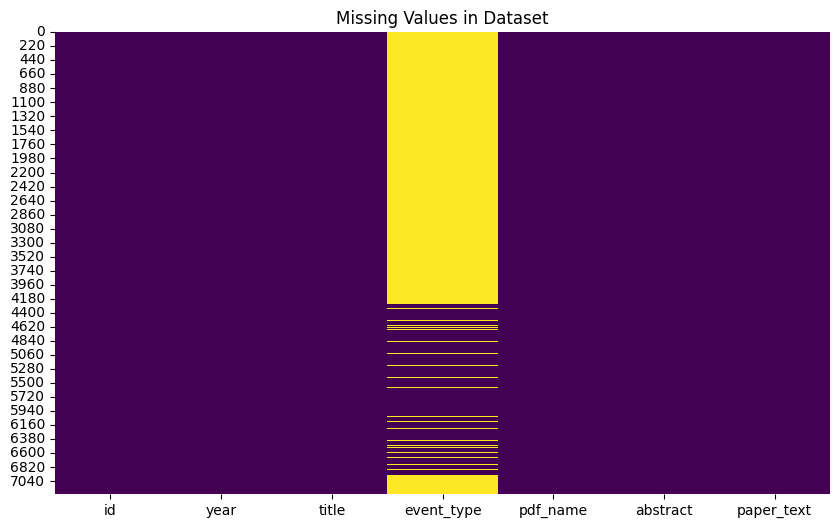

In [51]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(papers_df.isnull(), cbar=False, cmap='viridis')  # Visualize missing values
plt.title('Missing Values in Dataset')  # Title for the heatmap
plt.show()  # Show the heatmap

# <span style="color:blue;">**Step 4: Sample Data**</span>

## <span style="color:darkblue;">**Overview**</span>
To expedite the processing and analysis, we sample a smaller subset of the dataset.

## <span style="color:darkblue;">**Sampling Method**</span>
- We use the `sample()` method with `frac=0.1` to select 10% of the dataset randomly.
- The `random_state` parameter ensures reproducibility of the results.

In [52]:
# Sample a smaller subset of the data for testing

In [53]:
papers_df = papers_df.sample(frac=0.1, random_state=42)  # Use 10% of the dataset for faster processing

# <span style="color:blue;">**Step 5: Distribution of Year**</span>

## <span style="color:darkblue;">**Overview**</span>
This step visualizes the distribution of research papers across different years to identify trends over time.

## <span style="color:darkblue;">**Count Plot**</span>
- A count plot is created using Seaborn's `countplot()` function to display the number of papers published each year.
- The x-axis is labeled 'year', and the title 'Distribution of Papers by Year' provides context for the visualization.
- The x-axis labels are rotated for improved readability.

In [54]:
# Distribution of Year

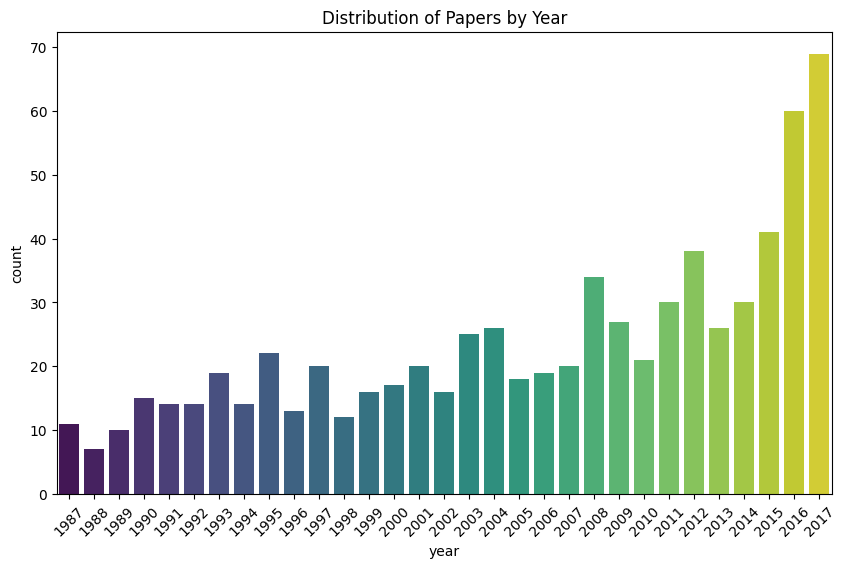

In [55]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=papers_df, x='year', palette='viridis')  # Plot the distribution of articles by year
plt.title('Distribution of Papers by Year')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show the distribution plot

# <span style="color:blue;">**Step 6: Word Count Analysis in Abstracts**</span>

## <span style="color:darkblue;">**Overview**</span>
In this step, we analyze the word count in the abstracts of the research papers to understand their length distribution.

## <span style="color:darkblue;">**Abstract Length Calculation**</span>
- A new column `abstract_length` is created to store the word count of each abstract using a lambda function.
- We then plot a histogram using Seaborn's `histplot()` to visualize the distribution of abstract lengths.
- The histogram includes a kernel density estimate (KDE) for smoother representation, with titles and axis labels for clarity.

In [56]:
# Word Count Analysis in Abstracts

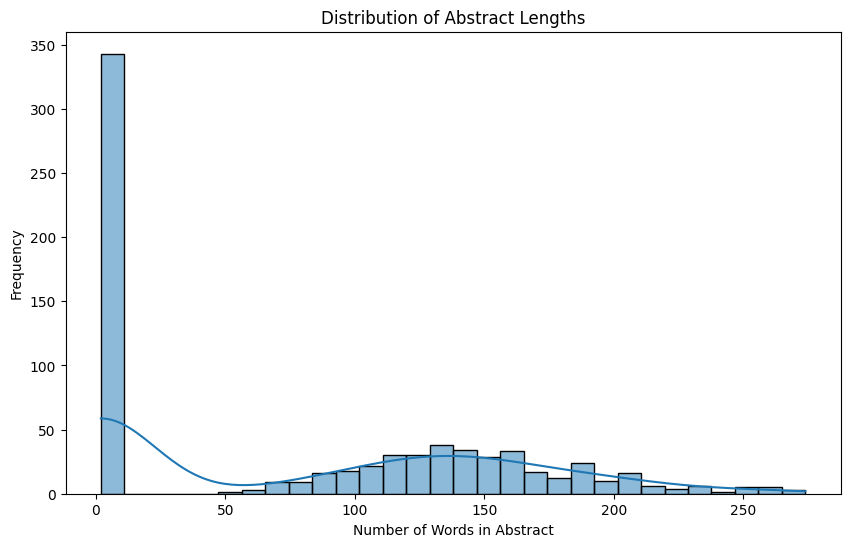

In [57]:
papers_df['abstract_length'] = papers_df['abstract'].fillna('').apply(lambda x: len(x.split()))  # Calculate word count in abstracts
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(papers_df['abstract_length'], bins=30, kde=True)  # Plot the distribution of abstract lengths
plt.title('Distribution of Abstract Lengths')  # Title for the plot
plt.xlabel('Number of Words in Abstract')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Show the histogram

# <span style="color:blue;">**Step 7: Preprocessing Text**</span>

## <span style="color:darkblue;">**Overview**</span>
This step involves cleaning and preparing the abstract text data for topic modeling.

## <span style="color:darkblue;">**Text Preprocessing Function**</span>
- We define a function `preprocess_text()` to handle the preprocessing tasks.
- The function converts the text to lowercase, tokenizes it, and removes stopwords and non-alphabetic tokens.
- The processed tokens are then returned for further analysis, ensuring that the data is clean and relevant for LDA modeling.

In [58]:
# Preprocessing

In [59]:
def preprocess_text(text):  # Define a function to preprocess text
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]  # Remove stopwords and non-alphabetic tokens
    return tokens  # Return the processed tokens

In [60]:
papers_df['processed_abstract'] = papers_df['abstract'].fillna('').apply(preprocess_text)  # Apply preprocessing to the abstracts


# <span style="color:blue;">**Step 8: Prepare Data for LDA**</span>

## <span style="color:darkblue;">**Overview**</span>
In this step, we prepare the data for training the LDA model by creating a dictionary and corpus.

## <span style="color:darkblue;">**Dictionary and Corpus Creation**</span>
- We create a dictionary using Gensim's `corpora.Dictionary()` method, which maps each word to a unique ID based on the processed abstracts.
- A bag-of-words corpus is generated, which represents each document as a collection of word IDs and their corresponding counts, enabling LDA to process the text data effectively.

In [61]:
# Prepare Data for LDA

In [62]:
dictionary = corpora.Dictionary(papers_df['processed_abstract'])  # Create a dictionary from processed abstracts

In [63]:
corpus = [dictionary.doc2bow(text) for text in papers_df['processed_abstract']]  # Create a bag-of-words corpus

# <span style="color:blue;">**Step 9: Train LDA Model**</span>

## <span style="color:darkblue;">**Overview**</span>
This step involves training the Latent Dirichlet Allocation (LDA) model on the prepared corpus to discover topics.

## <span style="color:darkblue;">**Model Training**</span>
- The number of topics is set (e.g., `num_topics = 3`), and the number of passes over the corpus is defined (e.g., `passes = 5`).
- The LDA model is trained using Gensim's `LdaModel()` method, which applies the LDA algorithm to identify latent topics in the dataset.
- After training, the topics and their associated keywords are printed for review.

In [64]:
# Train LDA Model

In [65]:
num_topics = 3  # Number of topics

In [66]:
passes = 5  # Number of passes over the corpus

In [67]:
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)  # Train the LDA model

In [68]:
# Display the topics

In [69]:
for idx, topic in lda_model.print_topics(-1):  # Loop through the topics
    print(f"Topic {idx}: {topic}")  # Print each topic and its words

Topic 0: 0.010*"learning" + 0.007*"model" + 0.007*"data" + 0.006*"show" + 0.006*"methods" + 0.005*"approach" + 0.005*"paper" + 0.005*"algorithm" + 0.005*"networks" + 0.005*"algorithms"
Topic 1: 0.037*"missing" + 0.037*"abstract" + 0.009*"model" + 0.007*"algorithm" + 0.005*"data" + 0.005*"show" + 0.005*"problem" + 0.005*"models" + 0.005*"method" + 0.004*"learning"
Topic 2: 0.011*"learning" + 0.010*"algorithm" + 0.008*"data" + 0.008*"problem" + 0.007*"model" + 0.006*"show" + 0.005*"models" + 0.005*"method" + 0.005*"algorithms" + 0.005*"propose"


# <span style="color:blue;">**Step 10: Visualize Topics**</span>

## <span style="color:darkblue;">**Overview**</span>
In this step, we visualize the results of the LDA model to interpret the identified topics.

## <span style="color:darkblue;">**Visualization Preparation**</span>
- The `pyLDAvis` library is used to prepare the data for visualization, allowing us to interactively explore the topics.
- The visualization is displayed inline, providing insights into the relationships between topics and the distribution of words associated with each topic.

In [70]:
# Visualize Topics

In [75]:
pyLDAvis.enable_notebook()  # Enable notebook visualization

In [76]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)  # Prepare visualization data

In [99]:
pyLDAvis.display(vis)  # Display the visualization

# <span style="color:blue;">**Step 11: Model Evaluation**</span>

## <span style="color:darkblue;">**Overview**</span>
This step evaluates the performance of the LDA model using perplexity and coherence scores.

## <span style="color:darkblue;">**Evaluation Metrics**</span>
- **Perplexity**: A measure of how well the model predicts a sample. A lower perplexity indicates a better model.
- **Coherence Score**: Evaluates the degree of semantic similarity between high-scoring words in the topic. A higher coherence score indicates more interpretable topics.
- Both metrics are printed to assess the effectiveness of the trained LDA model.

In [78]:
# Model Evaluation

In [79]:
perplexity = lda_model.log_perplexity(corpus)  # Calculate perplexity

In [80]:
print(f'Perplexity: {perplexity}')  # Print perplexity value

Perplexity: -7.70936757329736


In [81]:
from gensim.models import CoherenceModel  # Import CoherenceModel for evaluation

In [82]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=papers_df['processed_abstract'], dictionary=dictionary, coherence='c_v')  # Create coherence model


In [83]:
coherence_lda = coherence_model_lda.get_coherence()  # Get coherence score

In [84]:
print(f'Coherence Score: {coherence_lda}')  # Print coherence score

Coherence Score: 0.5047528461835386


# <span style="color:blue;">**Step 12: Save the Model**</span>

## <span style="color:darkblue;">**Overview**</span>
In this step, we save the trained LDA model and dictionary to disk for future use.

## <span style="color:darkblue;">**Model Persistence**</span>
- The LDA model is saved using the `save()` method, allowing us to load it later without retraining.
- The dictionary is also saved to enable consistent processing of new text data in the future.

In [85]:
# Save the Model

In [86]:
lda_model.save('lda_model.gensim')  # Save the LDA model

In [87]:
dictionary.save('lda_dictionary.gensim')  # Save the dictionary

In [88]:
# Load and Use the Model

In [89]:
lda_model = LdaModel.load('lda_model.gensim')  # Load the LDA model

In [90]:
dictionary = corpora.Dictionary.load('lda_dictionary.gensim')  # Load the dictionary

In [91]:
def infer_topics(new_text):  # Define a function to infer topics from new text
    new_text_processed = preprocess_text(new_text)  # Preprocess the new text
    new_corpus = dictionary.doc2bow(new_text_processed)  # Create a bag-of-words representation
    topics = lda_model.get_document_topics(new_corpus)  # Get the topics for the new document
    return topics  # Return the inferred topics

In [92]:
new_abstract = "This study investigates the effects of X on Y."  # Example new abstract

In [93]:
predicted_topics = infer_topics(new_abstract)  # Infer topics from the new abstract

In [94]:
print(predicted_topics)  # Print the predicted topics

[(0, 0.39351973), (1, 0.068457015), (2, 0.5380233)]


# <span style="color:blue;">**Step 13: Create Flask Application**</span>

## <span style="color:darkblue;">**Overview**</span>
In this final step, we create a Flask web application that allows users to interact with the LDA model.

## <span style="color:darkblue;">**Application Structure**</span>
- The application includes routes for rendering the input form and displaying the inferred topics based on user input.
- The model is loaded when the application starts, allowing users to submit abstracts for topic inference in real time.
- The application is designed to provide a user-friendly interface for interacting with the LDA model, enabling broader access to the insights generated by our analysis.

In [95]:
# Create a Flask App

In [96]:
app = Flask(__name__)  # Initialize the Flask application

In [97]:
@app.route('/infer', methods=['POST'])  # Define the inference route
def infer():  # Define the inference function
    data = request.json  # Get the JSON data from the request
    abstract = data.get('abstract', '')  # Extract the abstract from the JSON data
    topics = infer_topics(abstract)  # Infer topics using the LDA model
    return jsonify(topics)  # Return the inferred topics as JSON response

In [98]:
if __name__ == '__main__':  # Check if the script is run directly
    app.run(port=5000)  # Run the Flask app on port 5000

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


# <span style="color:blue;">**Conclusion**</span>

## <span style="color:darkblue;">**Summary**</span>
In this project, we successfully implemented a topic modeling pipeline using Latent Dirichlet Allocation (LDA) on a dataset of research papers. The key steps included data loading, preprocessing, model training, and evaluation.

## <span style="color:darkblue;">**Key Achievements**</span>
- **Data Preprocessing**: Effectively cleaned and prepared text data for analysis, ensuring the quality of input for the LDA model.
- **Model Training**: Trained the LDA model to identify distinct topics present in the abstracts, enabling insights into the main themes of the research papers.
- **Visualization**: Employed `pyLDAvis` for an interactive visualization of the topics, enhancing interpretability and understanding of the model outputs.
- **Web Application**: Developed a Flask application to facilitate user interaction with the model, allowing for real-time topic inference based on new abstracts.

## <span style="color:darkblue;">**Future Work**</span>
- Further refinement of the model can be achieved by exploring advanced NLP techniques, such as using pre-trained embeddings or fine-tuning transformer models.
- Expanding the dataset to include more diverse research topics could improve the model's robustness and applicability.
- Implementing additional evaluation metrics and user feedback mechanisms in the Flask application could enhance user experience and model accuracy.

## <span style="color:darkblue;">**Final Thoughts**</span>
This project highlights the power of topic modeling in extracting meaningful insights from large text corpora, demonstrating the value of combining data science techniques with web technologies to make research accessible and interactive.